# Problem Set 3

## Conceptual Questions

**A1.** The answers to these questions should be answerable without
referring to external materials. Briefly justify your answers with a few
words.

1.  Suppose that your estimated model for predicting house prices has a
    large positive weight on the feature number of bathrooms. If we
    remove this feature and refit the model, will the new model have a
    strictly higher error than before? Why?

2.  Compared to L2 norm penalty, explain why a L1 norm penalty is more
    likely to result in sparsity (a larger number of 0s) in the weight
    vector.

3.  In at most one sentence each, state one possible upside and one
    possible downside of using the following regularizer:
    $\left(\sum_{i}\left|w_{i}\right|^{0.5}\right)$.

4.  True or False: If the step-size for gradient descent is too large,
    it may not converge.

5.  In your own words, describe why stochastic gradient descent (SGD)
    works, even though only a small portion of the data is considered at
    each update.

6.  In at most one sentence each, state one possible advantage of SGD
    over GD (gradient descent), and one possible disadvantage of SGD
    relative to GD.

## Convexity and Norms

**A2.** A norm $\| \cdot \|$ over $\mathbb{R}^n$ is defined by the
properties: (i) non-negativity: $\|x\| \ge 0$ for all
$x \in \mathbb{R}^n$ with equality if and only if $x = 0$, (ii) absolute
scalability: $\|ax\| = |a| \|x\|$ for all $a \in \mathbb{R}$ and
$x \in \mathbb{R}^n$, (iii) triangle inequality:
$\|x + y\| \le \|x\| + \|y\|$ for all $x, y \in \mathbb{R}^n$.

1.  Show that $f(x) = \left(\sum_{i=1}^{n}\left|x_{i}\right|\right)$ is
    a norm. (Hint: for (iii), begin by showing that $|a+b| \le |a|+|b|$
    for all $a, b \in \mathbb{R}$.)

2.  Show that
    $g(x) = \left(\sum_{i=1}^{n}\left|x_{i}\right|^{1/2}\right)^2$ is
    not a norm. (Hint: it suffices to find two points in $n = 2$
    dimensions such that the triangle inequality does not hold.)

**Context:** norms are often used in regularization to encourage
specific behaviors of solutions. If we define
$\|x\|_{p} := \left(\sum_{i=1}^{n}\left|x_{i}\right|^{p}\right)^{1/p}$
then one can show that $\|x\|_{p}$ is a norm for all $p \ge 1$. The
important cases of $p = 2$ and $p = 1$ correspond to the penalty for
ridge regression and the lasso, respectively.

## Convexity of Sets

**A3.** A set $A \subset \mathbb{R}^n$ is convex if
$\lambda x + (1 - \lambda)y \in A$ for all $x, y \in A$ and
$\lambda \in [0,1]$.

For each of the grey-shaded sets below (I-III), state whether each one
is convex, or state why it is not convex using any of the points a, b,
c, d in your answer.

<figure>
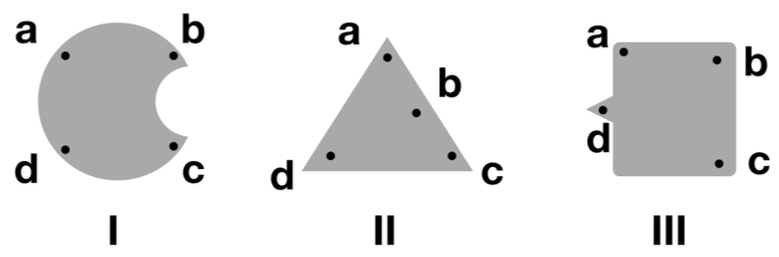
<figcaption aria-hidden="true">Grey Shaded Sets</figcaption>
</figure>

## Convexity of Functions

**A4.** We say a function $f: \mathbb{R}^d \to \mathbb{R}$ is convex on
a set $A$ if
$f(\lambda x + (1 - \lambda)y) \le \lambda f(x) + (1 - \lambda)f(y)$ for
all $x, y \in A$ and $\lambda \in [0,1]$.

For each of the functions shown below (I-III), state whether each is
convex on the specified interval, or state why not with a counterexample
using any of the points $a, b, c, d$ in your answer.

<figure>
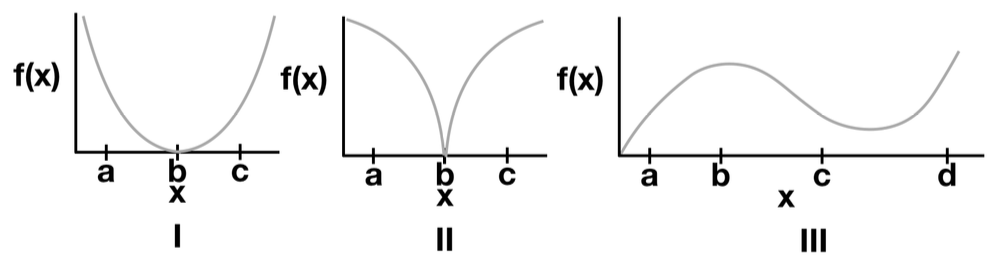
<figcaption aria-hidden="true">Functions</figcaption>
</figure>

1.  Function in panel I on $[a, c]$

2.  Function in panel II on $[a, c]$

3.  Function in panel III on $[a, d]$

4.  Function in panel III on $[c, d]$

## Lasso on a Real Dataset

**A5.** Given $\lambda > 0$ and data $(x_i, y_i)_{i=1}^n$, the Lasso is
the problem of solving

$$\arg \min_{w \in \mathbb{R}^d, b \in \mathbb{R}} \sum_{i=1}^n (x_i^T w + b - y_i)^2 + \lambda \sum_{j=1}^d |w_j|$$

where $\lambda$ is a regularization parameter. For the programming part
of this homework, you will implement the iterative shrinkage
thresholding algorithm shown in Algorithm 1 to solve the Lasso problem
in `ISTA.py`. This is a variant of the subgradient descent method and a
more detailed discussion can be found in these `slides`. You may use
common computing packages (such as `numpy` or `scipy`), but do not use
an existing Lasso solver (e.g., of `scikit-learn`).

You may use common computing packages (such as `numpy` or `scipy`), but
do not use an existing Lasso solver (e.g., of `scikit-learn`).

Before you get started, the following hints may be useful:

**Algorithm 1: Iterative Shrinkage Thresholding Algorithm for Lasso**

- **Input:** Step size $\eta$
- The algorithm proceeds in a `while` loop that continues
  `not converged`.
- Inside the `while` loop:
  - The bias term $b$ is updated:
    $b' \leftarrow b - 2\eta \sum_{i=1}^n (x_i^T w + b - y_i)$
  - A `for` loop iterates `for k ∈ {1,2,...d} do`:
    - The weight $w_k$ is updated:
      $w_k' \leftarrow w_k - 2\eta \sum_{i=1}^n x_{i,k} (x_i^T w + b - y_i)$
    - A conditional shrinkage step is applied to $w_k'$:
      - If $w_k' < -2\eta\lambda$, then
        $w_k' \leftarrow w_k + 2\eta\lambda$
      - If $w_k' \in [-2\eta\lambda, 2\eta\lambda]$, then
        $w_k' \leftarrow 0$
      - If $w_k' > 2\eta\lambda$, then
        $w_k' \leftarrow w_k - 2\eta\lambda$
  - After the `for` loop, the updated values are assigned:
    $b \leftarrow b'$, $w \leftarrow w'$

**Implementation Advice and Notes:**

- Wherever possible, use matrix libraries for matrix operations (not for
  loops).
- There are opportunities to considerably speed up parts of the
  algorithm by precomputing quantities like $a_k$ before the for loop;
  you are permitted to add these improvements (and it may save you some
  time).
- As a sanity check, ensure the objective value is nonincreasing with
  each step.
- It is up to you to decide on a suitable stopping condition. A common
  criteria is to stop when no element of $w$ changes by more than some
  small $\delta$ during an iteration. If you need your algorithm to run
  faster, an easy place to start is to loosen this condition.
- You will need to solve the Lasso on the same dataset for many values
  of $\lambda$. This is called a regularization path. One way to do this
  efficiently is to start at a large $\lambda$, and then for each
  consecutive solution, initialize the algorithm with the previous
  solution, decreasing $\lambda$ by a constant ratio (e.g., by a factor
  of 2).
- The smallest value of $\lambda$ for which the solution $\hat{w}$ is
  entirely zero is given by:
  $$\lambda_{max} = \max_{k=1,...,d} \left| 2 \sum_{i=1}^n x_{i,k} \left( y_i - \frac{1}{n} \sum_{j=1}^n y_j \right) \right| \quad (1)$$
- This is helpful for choosing the first $\lambda$ in a regularization
  path.

## Synthetic Data and Lasso Regularization Path

**A6.** We will first try your solver with some synthetic data. A
benefit of the Lasso is that if we believe many features are irrelevant
for predicting $y$, the Lasso can be used to enforce a sparse solution,
effectively differentiating between the relevant and irrelevant
features.

Suppose that $x \in \mathbb{R}^d$, $y \in \mathbb{R}$, $k < d$, and data
are generated independently according to the model
$y_i = w^T x_i + \epsilon_i$ where:

$$w_j = \begin{cases} j/k & \text{if } j \in \{1,...,k\} \\ 0 & \text{otherwise} \end{cases} \quad (2)$$

And $\epsilon_i \sim N(0, \sigma^2)$ is noise (note that in the model
above $b = 0$). We can see from Equation (2) that since $k < d$ and
$w_j = 0$ for $j > k$, the features $k+1$ through $d$ are irrelevant for
predicting $y$.

Generate a dataset using this model with $n = 500$, $d = 1000$,
$k = 100$, and $\sigma = 1$. You should generate the dataset such that
each $\epsilon_i \sim N(0, 1)$, and $y_i$ is generated as specified
above. You are free to choose a distribution from which the $x$’s are
drawn, but make sure standardize the $x$’s before running your
experiments.

1.  With your synthetic data, solve multiple Lasso problems on a
    regularization path, starting at $\lambda_{max}$ where no features
    are selected (see Equation (1)) and decreasing $\lambda$ by a
    constant ratio (e.g., 2) until nearly all the features are chosen.
    In plot 1, plot the number of non-zeros as a function of $\lambda$
    on the x-axis (Tip: use `plt.xscale('log')`).

2.  For each value of $\lambda$ tried, record values for false discovery
    rate (FDR) (number of incorrect nonzeros in $\hat{w}$/total number
    of nonzeros in $\hat{w}$) and true positive rate (TPR) (number of
    correct nonzeros in $\hat{w}/k$). Note: for each $j$, $\hat{w}_j$ is
    an incorrect nonzero if and only if $\hat{w}_j \neq 0$ while
    $w_j = 0$. In plot 2, plot these values with the x-axis as FDR, and
    the y-axis as TPR. Note that in an ideal situation we would have an
    (FDR,TPR) pair in the upper left corner. We can always trivially
    achieve (0,0) and $(\frac{d-k}{d}, 1)$.

3.  Comment on the effect of $\lambda$ in these two plots in 1-2
    sentences.

## Crime Data Analysis

**A7.** We’ll now put the Lasso to work on some real data in
`crime_data_lasso.py`. We have read in the data for you with the
following:

``` python
df_train, df_test = load_dataset("crime")
```

This stores the data as Pandas DataFrame objects. DataFrames are similar
to Numpy arrays but more flexible; unlike arrays, DataFrames store row
and column indices along with the values of the data. Each column of a
DataFrame can also store data of a different type (here, all data are
floats). Here are a few commands that will get you working with Pandas
for this assignment:

``` python
df.head()                     # Print the first few lines of DataFrame df.
df.index                      # Get the row indices for df.
df.columns                    # Get the column indices.
df['foo']                     # Return the column named 'foo'.
df.drop('foo', axis = 1)      # Return all columns except 'foo'.
df.values                     # Return the values as a Numpy array.
df['foo'].values              # Grab column foo and convert to Numpy array.
df.iloc[:3,:3]                # Use numerical indices (like Numpy) to get 3 rows and cols.
```

The data consist of local crime statistics for 1,994 US communities. The
response $y$ is the rate of violent crimes reported per capita in a
community. The name of the response variable is ViolentCrimesPerPop, and
it is held in the first column of df_train and df_test. There are 95
features. These features include many variables. Some features are the
consequence of complex political processes, such as the size of the
police force and other systemic and historical factors. Others are
demographic characteristics of the community, including self-reported
statistics about race, age, education, and employment drawn from Census
reports.

The goals of this problem are threefold: (i) to encourage you to think
about how data collection processes affect the resulting model trained
from that data; (ii) to encourage you to think deeply about models you
might train and how they might be misused; and (iii) to see how Lasso
encourages sparsity of linear models in settings where $d$ is large
relative to $n$. We emphasize that training a model on this dataset can
suggest a degree of correlation between a community’s demographics and
the rate at which a community experiences and reports violent crime. We
strongly encourage students to consider why these correlations may or
may not hold more generally, whether correlations might result from a
common cause, and what issues can result in misinterpreting what a model
can explain.

The dataset is split into a training and test set with 1,595 and 399
entries, respectively¹. We will use this training set to fit a model to
predict the crime rate in new communities and evaluate model performance
on the test set. As there are a considerable number of input variables
and fairly few training observations, overfitting is a serious issue. In
order to avoid this, use the Lasso algorithm implemented in the previous
problem.

1.  Read the documentation for the original version of this dataset:
    `http://archive.ics.uci.edu/ml/datasets/communities+and+crime`.
    Report 3 features included in this dataset for which historical
    policy choices in the US would lead to variability in these
    features. As an example, the *number of police* in a community is
    often the consequence of decisions made by governing bodies,
    elections, and amount of tax revenue available to decision makers.

2.  Before you train a model, describe 3 features in the dataset which
    might, if found to have nonzero weight in model, be interpreted as
    *reasons* for higher levels of violent crime, but which might
    actually be a *result* rather than (or in addition to being) the
    cause of this violence.

Now, we will run the Lasso solver. Begin with $\lambda = \lambda_{max}$
defined in Equation (1). Initialize all weights to 0. Then, reduce
$\lambda$ by a factor of 2 and run again, but this time initialize
$\hat{w}$ from your $\lambda = \lambda_{max}$ solution as your initial
weights, as described above. Continue the process of reducing $\lambda$
by a factor of 2 until $\lambda < 0.01$. For all plots use a log-scale
for the $\lambda$ dimension (Tip: use `plt.xscale('log')`).

1.  Plot the number of nonzero weights of each solution as a function of
    $\lambda$.

2.  Plot the regularization paths (in one plot) for the coefficients for
    input variables `agePct12t29`, `pctWSocSec`, `pctUrban`,
    `agePct65up`, and `householdsize`.

3.  On one plot, plot the squared error on the training and test data as
    a function of $\lambda$.

4.  Sometimes a larger value of $\lambda$ performs nearly as well as a
    smaller value, but a larger value will select fewer variables and
    perhaps be more interpretable. Retrain and inspect the weights
    $\hat{w}$ for $\lambda = 30$ and for *all* input variables. Which
    feature had the largest (most positive) Lasso coefficient? What
    about the most negative? Discuss briefly.

5.  Suppose there was a large negative weight on `agePct65up` and upon
    seeing this result, a politician suggests policies that encourage
    people over the age of 65 to move to high crime areas in an effort
    to reduce crime. What is the (statistical) flaw in this line of
    reasoning? (Hint: fire trucks are often seen around burning
    buildings, do fire trucks cause fire?)

## Logistic Regression

### Binary Logistic Regression

**A8.** Here we consider the MNIST dataset, but for binary
classification. Specifically, the task is to determine whether a digit
is a 2 or 7. Here, let $Y = 1$ for all the “7” digits in the dataset,
and use $Y = -1$ for “2”. We will use regularized logistic regression.
Given a binary classification dataset $\{(x_i, y_i)\}_{i=1}^n$ for
$x_i \in \mathbb{R}^d$ and $y_i \in \{-1, 1\}$ we showed in class that
the regularized negative log likelihood objective function can be
written as

$$J(w, b) = \frac{1}{n} \sum_{i=1}^n \log(1 + \exp(-y_i(b + x_i^T w))) + \lambda||w||^2$$

Note that the offset term $b$ is not regularized. For all experiments,
use $\lambda = 10^{-1}$. Let
$\mu_i(w, b) = \frac{1}{1+\exp(-y_i(b+x_i^T w))}$.

1.  Derive the gradients $\nabla_wJ(w,b)$, $\nabla_bJ(w, b)$ and give
    your answers in terms of $\mu_i(w, b)$ (your answers should not
    contain exponentials).

2.  Implement gradient descent with an initial iterate of all zeros. Try
    several values of step sizes to find one that appears to make
    convergence on the training set as fast as possible. Run until you
    feel you are near to convergence.

<!-- -->

1.  For both the training set and the test, plot $J(w, b)$ as a function
    of the iteration number (and show both curves on the same plot).

2.  For both the training set and the test, classify the points
    according to the rule $\operatorname{sign}(b + x^T w)$ and plot the
    misclassification error as a function of the iteration number (and
    show both curves on the same plot).

Reminder: Make sure you are only using the test set for evaluation (not
for training).

1.  Repeat (b) using stochastic gradient descent with a batch size of 1.
    Note, the expected gradient with respect to the random selection
    should be equal to the gradient found in part (a). Show both plots
    described in (b) when using batch size 1. Take careful note of how
    to scale the learning rate.

2.  Repeat (b) using stochastic gradient descent with batch size of 100.
    That is, instead of approximating the gradient with a single
    example, use 100. Note, the expected gradient with respect to the
    random selection should be equal to the gradient found in part (a).